#**Drive Mount**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Import some important library.
import pandas as pd            
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gc
import warnings
warnings.filterwarnings("ignore")

# **Read COVID_19 dataset of USA.**

In [3]:
usa=pd.read_csv('/content/drive/MyDrive/USA/all-states-history.csv')
usa.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-01-10,AK,A,224.0,NaN,0,NaN,1101.0,1101.0,82.0,1,NaN,NaN,1303856.0,6657,NaN,NaN,1292805.0,NaN,10.0,48624.0,NaN,250,0,NaN,NaN,NaN,NaN,58210.0,7165.0,NaN,0,1352480.0,6907,NaN,NaN,NaN,NaN,NaN,0,1352480.0,6907
1,2021-01-10,AL,A,5334.0,4587.0,35,747.0,36754.0,36754.0,2863.0,0,2459.0,NaN,1645371.0,7584,NaN,NaN,NaN,1405.0,NaN,401900.0,321285.0,2750,0,NaN,NaN,NaN,NaN,NaN,211684.0,NaN,0,1966656.0,9870,NaN,NaN,92956.0,NaN,1966656.0,9870,NaN,0
2,2021-01-10,AR,A+,4010.0,3338.0,0,672.0,12115.0,12115.0,1346.0,28,NaN,426.0,1953123.0,0,NaN,NaN,1953123.0,1290.0,223.0,251746.0,204893.0,0,0,NaN,3300.0,NaN,55322.0,NaN,219887.0,NaN,0,2158016.0,0,NaN,21856.0,NaN,284502.0,NaN,0,2158016.0,0
3,2021-01-10,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,2140.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-01-10,AZ,A+,10141.0,9102.0,105,1039.0,43582.0,43582.0,4988.0,487,NaN,1122.0,2490171.0,20312,NaN,NaN,NaN,NaN,791.0,618546.0,585091.0,11201,0,NaN,NaN,NaN,NaN,NaN,85004.0,NaN,0,5635119.0,77755,398856.0,NaN,NaN,NaN,3075262.0,30756,5635119.0,77755


In [4]:
usa.shape

(17603, 42)

In [5]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17603 entries, 0 to 17602
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              17603 non-null  object 
 1   state                             17603 non-null  object 
 2   dataQualityGrade                  16332 non-null  object 
 3   death                             16767 non-null  float64
 4   deathConfirmed                    7802 non-null   float64
 5   deathIncrease                     17603 non-null  int64  
 6   deathProbable                     6061 non-null   float64
 7   hospitalized                      10764 non-null  float64
 8   hospitalizedCumulative            10764 non-null  float64
 9   hospitalizedCurrently             14371 non-null  float64
 10  hospitalizedIncrease              17603 non-null  int64  
 11  inIcuCumulative                   3120 non-null   float64
 12  inIc

# **Preprocessing**

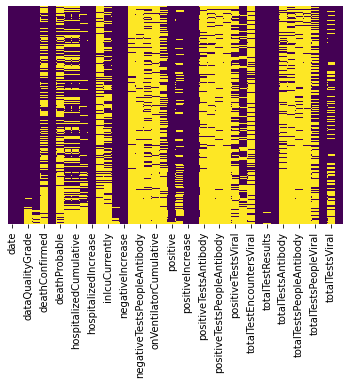

In [6]:
# Null value visualization present in dataset.
sns.heatmap(usa.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig('/content/drive/MyDrive/USA/null.png',dpi=300)

In [7]:
# No. of null values present in each features of datasets.
usa.isnull().sum()

date                                    0
state                                   0
dataQualityGrade                     1271
death                                 836
deathConfirmed                       9801
deathIncrease                           0
deathProbable                       11542
hospitalized                         6839
hospitalizedCumulative               6839
hospitalizedCurrently                3232
hospitalizedIncrease                    0
inIcuCumulative                     14483
inIcuCurrently                       8420
negative                              306
negativeIncrease                        0
negativeTestsAntibody               16398
negativeTestsPeopleAntibody         16695
negativeTestsViral                  13637
onVentilatorCumulative              16534
onVentilatorCurrently               10272
positive                              154
positiveCasesViral                   4821
positiveIncrease                        0
positiveScore                     

In [8]:
usa['dataQualityGrade'].unique()

array(['A', 'A+', 'D', 'B', 'C', nan, '#REF!', 'F'], dtype=object)

In [9]:
print('Total no. of Null values present in dataQualityGrade column : ',usa['dataQualityGrade'].isnull().sum())
usa['dataQualityGrade'].replace([np.inf,-np.inf,np.nan],'E', inplace=True)  # 

Total no. of Null values present in dataQualityGrade column :  1271


In [10]:
# Using LabelEncoder convert object type to int64.
from sklearn.preprocessing import LabelEncoder   

encoder = LabelEncoder()
encoded = encoder.fit_transform(usa['dataQualityGrade'].values)
usa['dataQualityGrade'] = pd.Series(encoded, index=usa.index)
usa['dataQualityGrade'].unique()

array([1, 2, 5, 3, 4, 6, 0, 7])

In [11]:
# Replace all null values into some value.
usa.replace([np.inf, -np.inf,np.nan],0.0, inplace=True)

In [12]:
# After filling null values, no. of null values present in dataset.
usa.isnull().sum()

date                                0
state                               0
dataQualityGrade                    0
death                               0
deathConfirmed                      0
deathIncrease                       0
deathProbable                       0
hospitalized                        0
hospitalizedCumulative              0
hospitalizedCurrently               0
hospitalizedIncrease                0
inIcuCumulative                     0
inIcuCurrently                      0
negative                            0
negativeIncrease                    0
negativeTestsAntibody               0
negativeTestsPeopleAntibody         0
negativeTestsViral                  0
onVentilatorCumulative              0
onVentilatorCurrently               0
positive                            0
positiveCasesViral                  0
positiveIncrease                    0
positiveScore                       0
positiveTestsAntibody               0
positiveTestsAntigen                0
positiveTest

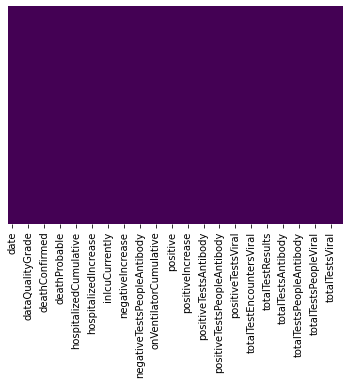

In [13]:
# After filling null values, visualization of datasets.
sns.heatmap(usa.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig('/content/drive/MyDrive/USA/null1.png',dpi=300)

In [14]:
# No. of state present in USA.
usa['state'].unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

In [15]:
# Represent each State name of USA as a Full name using dictionary.
dict1 = {'AK':'Alaska','AL':'Alabama', 'AR':'Arkansas', 'AS':'American_Samoa', 'AZ':'Arizona', 'CA':'California', 'CO':'Colorado', 'CT':'Connecticut', 'DC':'District of Columbia', 'DE':'Delaware', 'FL':'Florida',
       'GA':'Georgia', 'GU':'Guam', 'HI':'Hawaii', 'IA':'Iowa', 'ID':'Idaho', 'IL':'Illinois', 'IN':'Indiana', 'KS':'Kansas', 'KY':'Kentucky', 'LA':'Louisiana', 'MA':'Massachusetts',
       'MD':'Maryland', 'ME':'Maine', 'MI':'Michigan', 'MN':'Minnesota', 'MO':'Missouri', 'MP':'Northern_Mariana_Islands', 'MS':'Mississippi', 'MT':'Montana', 'NC':'North_Carolina', 'ND':'North_Dakota', 'NE':'Nebraska',
       'NH':'New_Hampshire', 'NJ':'New_Jersey', 'NM':'New_Mexico', 'NV':'Nevada', 'NY':'New_York', 'OH':'Ohio', 'OK':'Oklahoma', 'OR':'Oregon', 'PA':'Pennsylvania', 'PR':'Puerto_Rico', 'RI':'Rhode_Island',
       'SC':'South_Carolina', 'SD':'South_Dakota', 'TN':'Tennessee', 'TX':'Texas', 'UT':'Utah', 'VA':'Virginia', 'VI':'Virgin_Islands', 'VT':'Vermont', 'WA':'Washington', 'WI':'Wisconsin', 'WV':'West_Virginia',
       'WY':'Wyoming'}

usa.replace({'state':dict1},inplace=True)  # Convert Label into dict(key,values)
usa['state'].unique()

array(['Alaska', 'Alabama', 'Arkansas', 'American_Samoa', 'Arizona',
       'California', 'Colorado', 'Connecticut', 'District of Columbia',
       'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Iowa',
       'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana',
       'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota',
       'Missouri', 'Northern_Mariana_Islands', 'Mississippi', 'Montana',
       'North_Carolina', 'North_Dakota', 'Nebraska', 'New_Hampshire',
       'New_Jersey', 'New_Mexico', 'Nevada', 'New_York', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto_Rico',
       'Rhode_Island', 'South_Carolina', 'South_Dakota', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Virgin_Islands', 'Vermont',
       'Washington', 'Wisconsin', 'West_Virginia', 'Wyoming'],
      dtype=object)

# **Data Analysis**

Text(0.5, 0, 'Total Case')

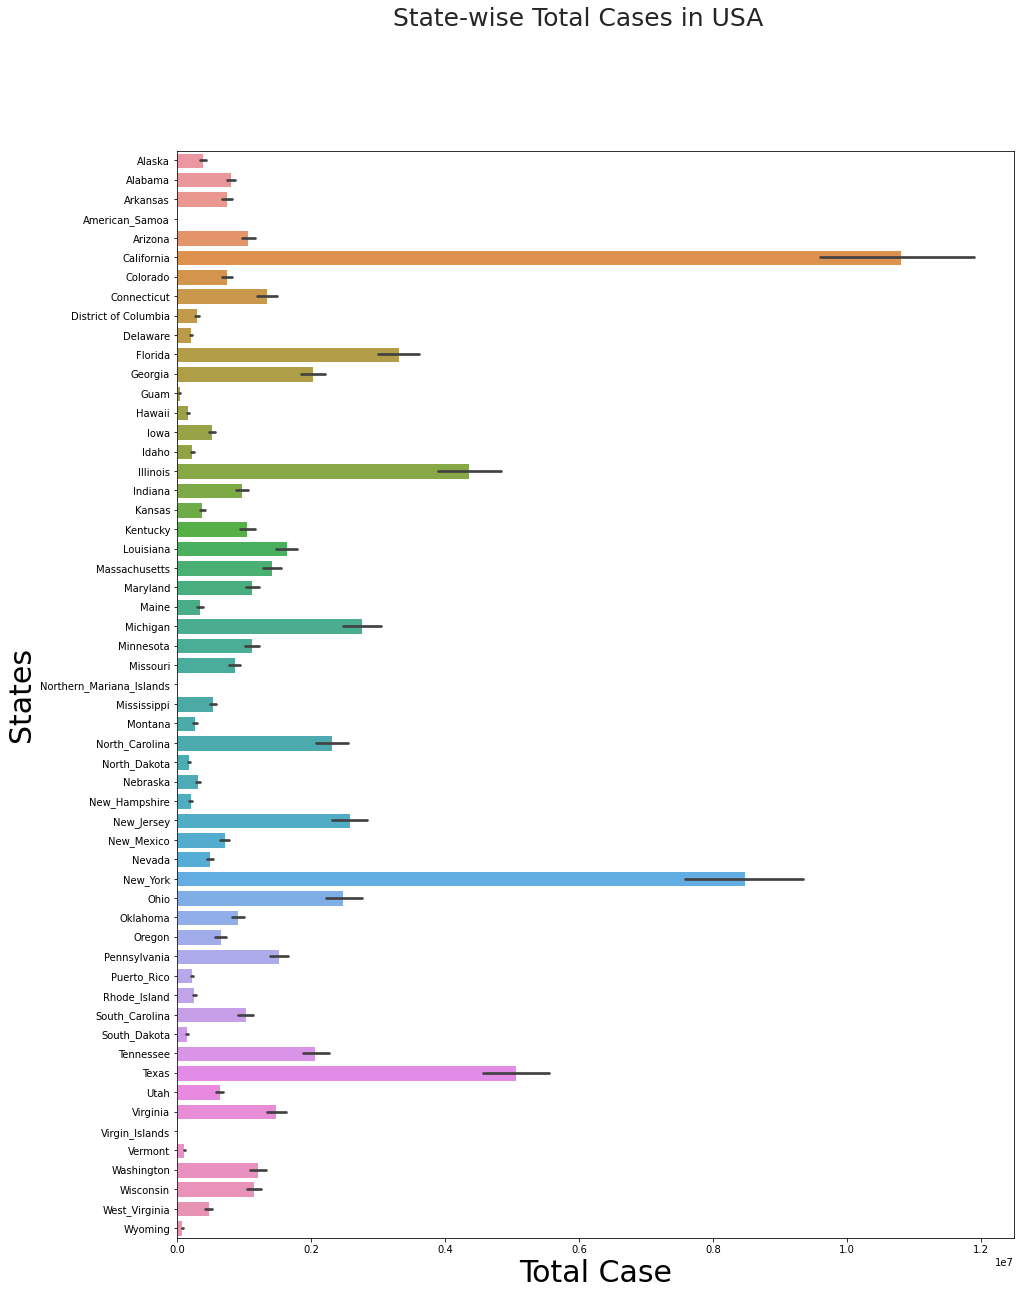

In [16]:
# State-wise total cases visualization.
usa['total'] = usa['positive']+usa['negative']
fig, ax = plt.subplots(figsize=(15,20))
sns.set(style="whitegrid")
sns.barplot(x='total',y='state',data=usa)
fig.suptitle('State-wise Total Cases in USA ', fontsize=25)
plt.ylabel('States',fontsize=30)
plt.xlabel('Total Case',fontsize=30)

Text(0.5, 0, 'Positive Case')

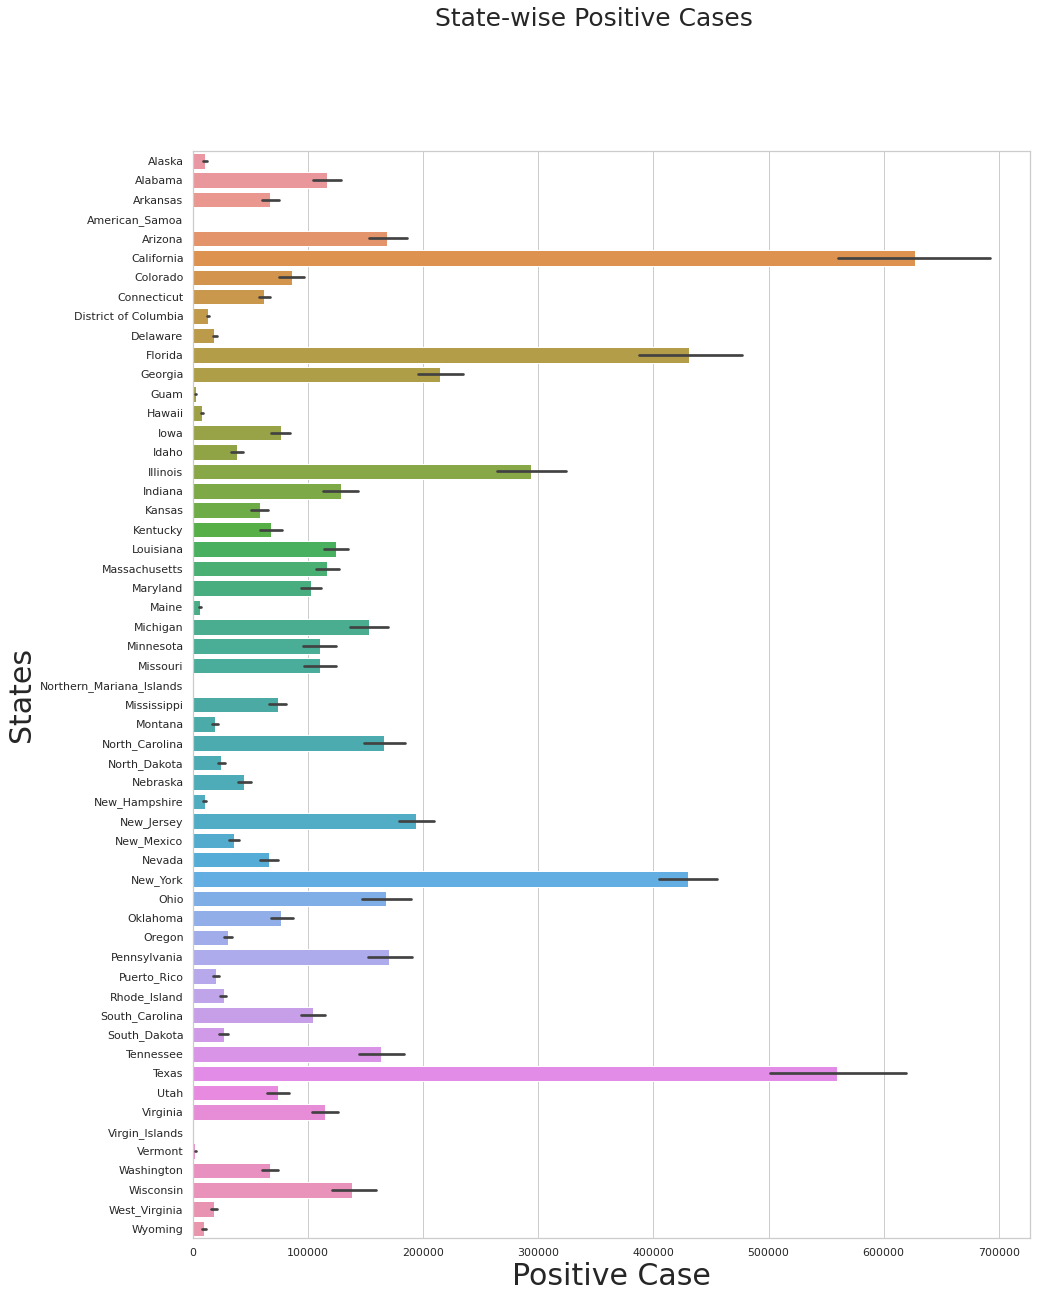

In [17]:
# State-wise positive cases in USA.
fig, ax = plt.subplots(figsize=(15,20))
sns.set(style="whitegrid")
sns.barplot(x='positive',y='state',data=usa)
fig.suptitle('State-wise Positive Cases ', fontsize=25)
plt.ylabel('States',fontsize=30)
plt.xlabel('Positive Case',fontsize=30)

Text(0.5, 0, 'Deaths')

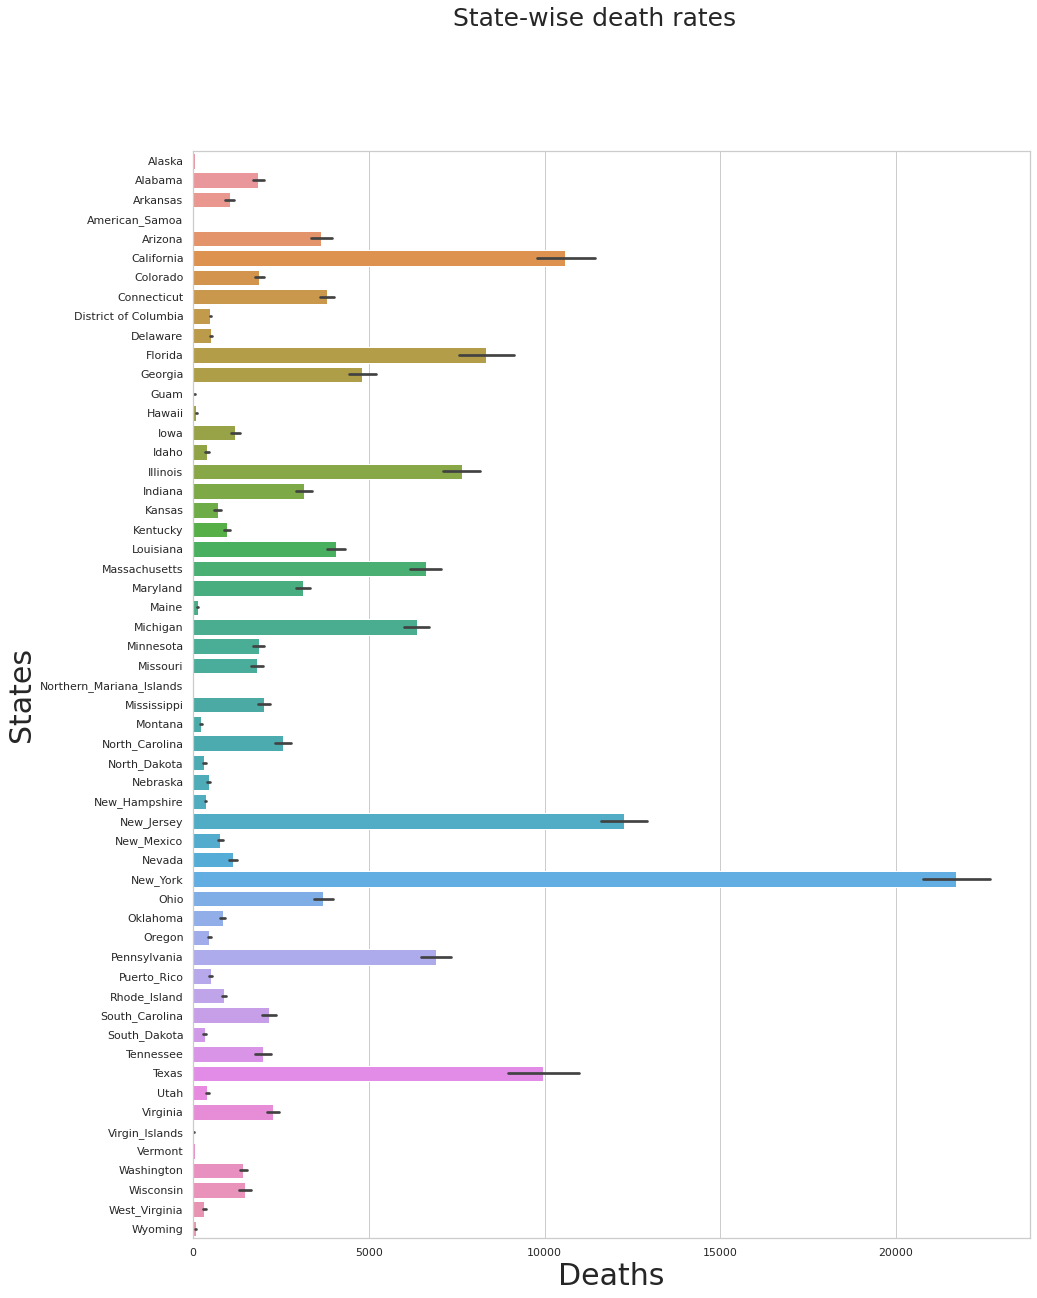

In [18]:
# State-wise death rates in USA.
fig, ax = plt.subplots(figsize=(15,20))
sns.set(style="whitegrid")
sns.barplot(x='death',y='state',data=usa)
fig.suptitle('State-wise death rates ', fontsize=25)
plt.ylabel('States',fontsize=30)
plt.xlabel('Deaths',fontsize=30)

In [19]:
# Date wise grouping the Confirmed, Deaths and Recovered cases of USA.
confirmed = usa.groupby('date').sum()['positive'].reset_index()
deaths = usa.groupby('date').sum()['death'].reset_index()
recovered = usa.groupby('date').sum()['recovered'].reset_index()

In [20]:
# Visualization of Confirmed, Deaths and Recovered cases.
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['date'], y=confirmed['positive'],
                name='Confirmed',marker_color='Blue'))

fig.add_trace(go.Bar(x=deaths['date'],y=deaths['death'],
                name='Deaths',marker_color='Red'))

fig.add_trace(go.Bar(x=recovered['date'],y=recovered['recovered'],
                name='Recovered',marker_color='Green'))

fig.update_layout(title='USA COVID 19 Cases - Confirmed, Deaths, Recovered (Bar Chart)',
    xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases',titlefont_size=16,
    tickfont_size=14,),legend=dict(x=0,y=1.0,bgcolor='rgba(255, 255, 255, 0)',
    bordercolor='rgba(255, 255, 255, 0)'),barmode='group',
    bargap=0.15,                      # gap between bars of adjacent location coordinates.
    bargroupgap=0.1                   # gap between bars of the same location coordinate.
)

fig.show()

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['date'], 
                         y=confirmed['positive'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=deaths['date'], 
                         y=deaths['death'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))
fig.add_trace(go.Scatter(x=recovered['date'], 
                         y=recovered['recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='Green', width=2)
                        ))

fig.update_layout(
    title='USA COVID 19 Cases - Confirmed, Deaths, Recovered (Line Chart)',
    xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases',titlefont_size=16,
    tickfont_size=14,),legend=dict(x=0,y=1.0,
    bgcolor='rgba(255, 255, 255, 0)',
    bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

In [22]:
# # After that 'date' convert into datetime then again convert it into Float64 Types
# from datetime import datetime
# usa['date']=pd.to_datetime(usa['date'])
# usa['date']=usa['date'].values.astype('float64')

In [23]:
# encoder=LabelEncoder()
# encoded=encoder.fit_transform(usa['state'].values)
# usa['state'] = pd.Series(encoded, index=usa.index)
# usa['state'].unique()

In [24]:
usa = usa.set_index('date')
usa.head()

,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,total
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-10,Alaska,1,224.0,0.0,0,0.0,1101.0,1101.0,82.0,1,0.0,0.0,1303856.0,6657,0.0,0.0,1292805.0,0.0,10.0,48624.0,0.0,250,0,0.0,0.0,0.0,0.0,58210.0,7165.0,0.0,0,1352480.0,6907,0.0,0.0,0.0,0.0,0.0,0,1352480.0,6907,1352480.0
2021-01-10,Alabama,1,5334.0,4587.0,35,747.0,36754.0,36754.0,2863.0,0,2459.0,0.0,1645371.0,7584,0.0,0.0,0.0,1405.0,0.0,401900.0,321285.0,2750,0,0.0,0.0,0.0,0.0,0.0,211684.0,0.0,0,1966656.0,9870,0.0,0.0,92956.0,0.0,1966656.0,9870,0.0,0,2047271.0
2021-01-10,Arkansas,2,4010.0,3338.0,0,672.0,12115.0,12115.0,1346.0,28,0.0,426.0,1953123.0,0,0.0,0.0,1953123.0,1290.0,223.0,251746.0,204893.0,0,0,0.0,3300.0,0.0,55322.0,0.0,219887.0,0.0,0,2158016.0,0,0.0,21856.0,0.0,284502.0,0.0,0,2158016.0,0,2204869.0
2021-01-10,American_Samoa,5,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,2140.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2140.0,0,0.0,0.0,0.0,0.0,0.0,0,2140.0,0,2140.0
2021-01-10,Arizona,2,10141.0,9102.0,105,1039.0,43582.0,43582.0,4988.0,487,0.0,1122.0,2490171.0,20312,0.0,0.0,0.0,0.0,791.0,618546.0,585091.0,11201,0,0.0,0.0,0.0,0.0,0.0,85004.0,0.0,0,5635119.0,77755,398856.0,0.0,0.0,0.0,3075262.0,30756,5635119.0,77755,3108717.0


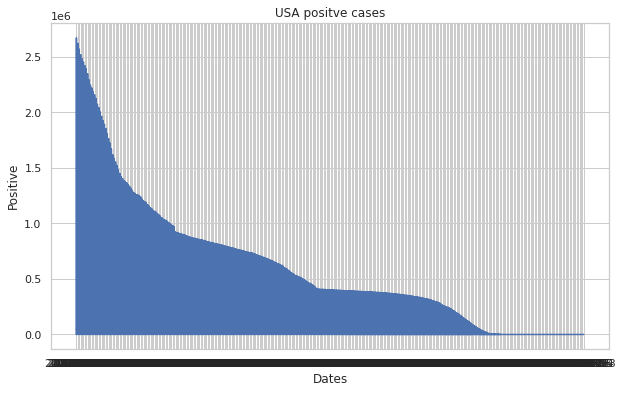

In [26]:
#plot positive case
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Positive')
plt.plot(usa['positive'])
plt.title('USA positve cases')
plt.show()

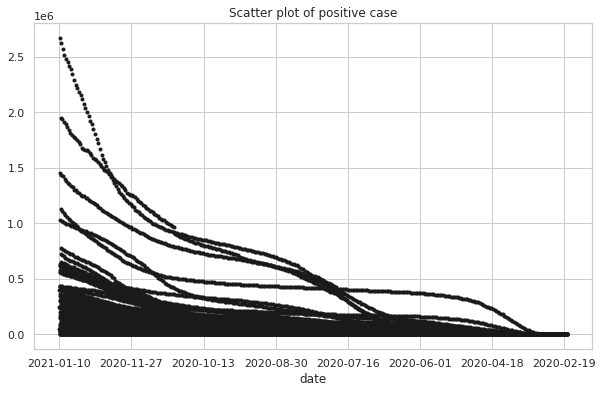

In [28]:
plt.figure(figsize=(10,6))
df_positive = usa['positive']
df_positive.plot(style='k.')
plt.title('Scatter plot of positive case')
plt.show()

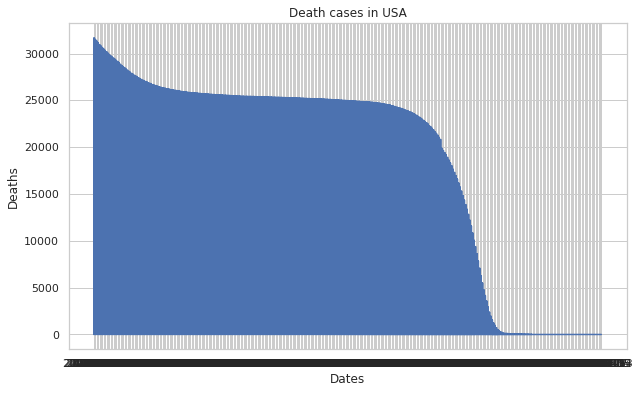

In [29]:
#plot positive case
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Deaths')
plt.plot(usa['death'])
plt.title('Death cases in USA')
plt.show()

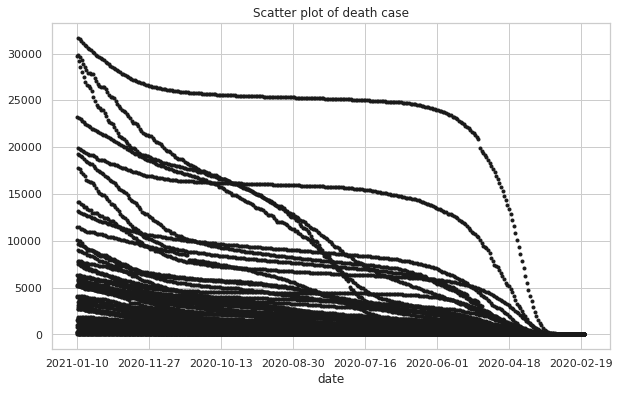

In [30]:
plt.figure(figsize=(10,6))
df_deaths = usa['death']
df_deaths.plot(style='k.')
plt.title('Scatter plot of death case')
plt.show()

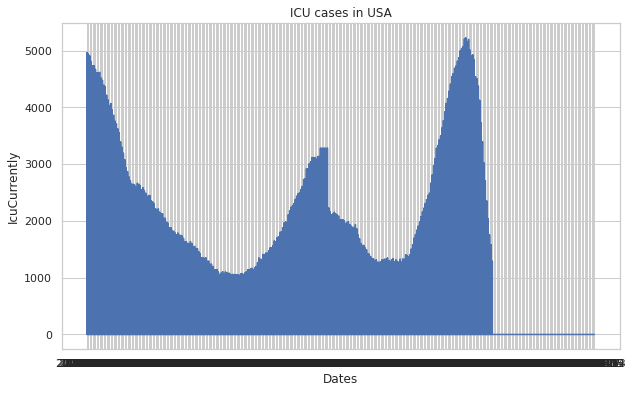

In [31]:
#plot positive case
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('IcuCurrently')
plt.plot(usa['inIcuCurrently'])
plt.title('ICU cases in USA')
plt.show()

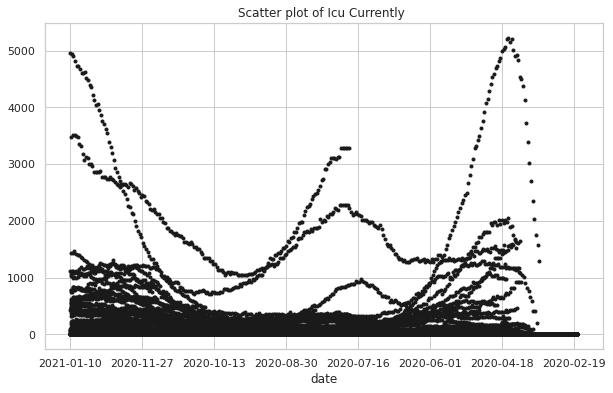

In [32]:
plt.figure(figsize=(10,6))
df_icu = usa['inIcuCurrently']
df_icu.plot(style='k.')
plt.title('Scatter plot of Icu Currently ')
plt.show()

In [33]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 6.8MB/s 
     |████████████████████████████████| 9.5MB 13.3MB/s 
     |████████████████████████████████| 2.1MB 35.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

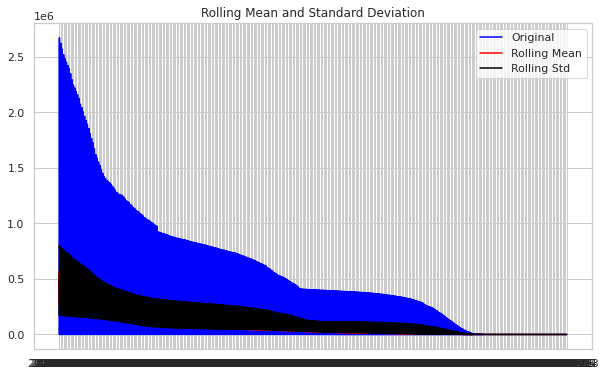

Results of dickey fuller test
Test Statistics                   -3.107198
p-value                            0.026025
No. of lags used                  44.000000
Number of observations used    17558.000000
critical value (1%)               -3.430722
critical value (5%)               -2.861705
critical value (10%)              -2.566858
dtype: float64


In [35]:
# Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_positive)

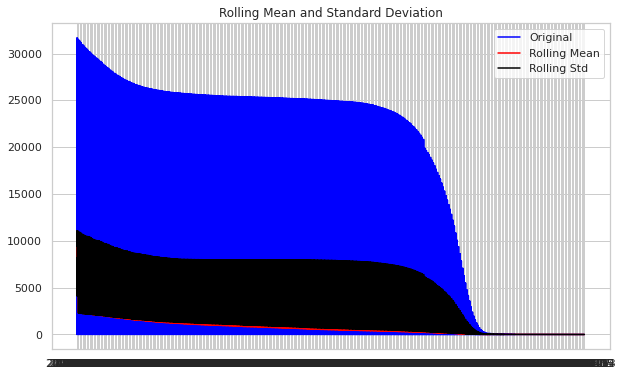

Results of dickey fuller test
Test Statistics                   -5.144135
p-value                            0.000011
No. of lags used                  44.000000
Number of observations used    17558.000000
critical value (1%)               -3.430722
critical value (5%)               -2.861705
critical value (10%)              -2.566858
dtype: float64


In [36]:
test_stationarity(df_deaths)

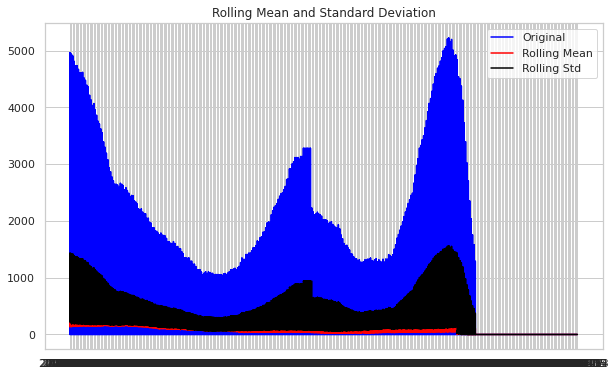

Results of dickey fuller test
Test Statistics               -7.599541e+00
p-value                        2.409748e-11
No. of lags used               4.400000e+01
Number of observations used    1.755800e+04
critical value (1%)           -3.430722e+00
critical value (5%)           -2.861705e+00
critical value (10%)          -2.566858e+00
dtype: float64


In [37]:
test_stationarity(df_icu)

# **Model Implementation Using Prophet**

**In this segment, we’re going to generate 1,3,and 6 monthly ahead forecast of confirmed, death and ICU_patiant cases of COVID-19 using Prophet.**


In [38]:
from fbprophet import Prophet
confirmed = usa.groupby(['state','date']).sum()['positive'].reset_index()
deaths = usa.groupby(['state','date']).sum()['death'].reset_index()
icu = usa.groupby(['state','date']).sum()['inIcuCurrently'].reset_index()

In [39]:
# Create a common model for all cases.
def prediction(pred,x):
  m = Prophet(interval_width=0.95) 
  m.fit(pred) 
  future = m.make_future_dataframe(periods=x) 
  forecast = m.predict(future)
  confirmed_forecast_plot = m.plot(forecast)
  confirmed_forecast_plot =m.plot_components(forecast)
  return forecast

#**1) Predict State wise new cases in the next 1, 3, 6 months**

#**Next 1 months New_cases prediction of COVID 19 in USA**

In [40]:
confirmed.columns = ['state','ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,state,ds,y
17598,Wyoming,2021-01-06,45890.0
17599,Wyoming,2021-01-07,46168.0
17600,Wyoming,2021-01-08,46647.0
17601,Wyoming,2021-01-09,46719.0
17602,Wyoming,2021-01-10,46832.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


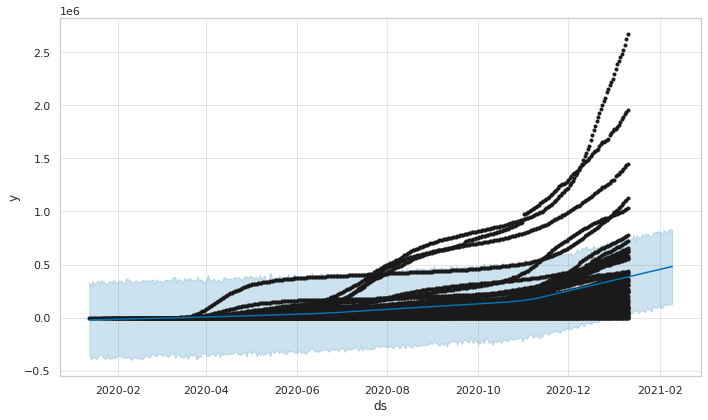

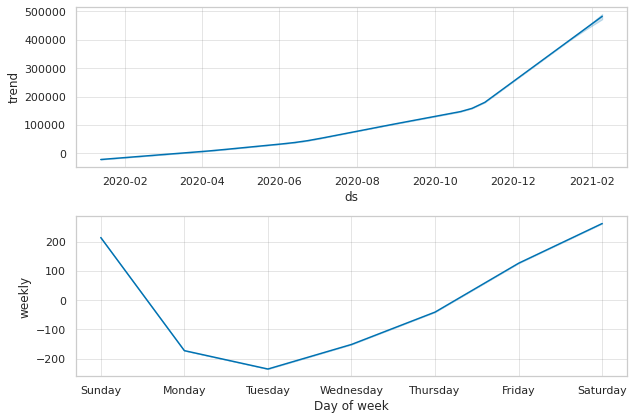

In [41]:
f=prediction(confirmed,30)

In [43]:
f.rename(columns={"ds": "date", "yhat": "new_cases","yhat_lower": "new_cases_min", "yhat_upper": "new_cases_max"},inplace=True)
f[['date', 'new_cases', 'new_cases_min', 'new_cases_max']].tail(10)

,date,new_cases,new_cases_min,new_cases_max
384,2021-01-31,452511.973954,111545.728823,810769.737619
385,2021-02-01,455410.506807,97490.437265,808934.791571
386,2021-02-02,458632.859066,89702.741655,774397.734136
387,2021-02-03,462002.122486,104423.784820,820933.570383
388,2021-02-04,465398.017901,127551.264076,819340.970317
389,2021-02-05,468850.399727,124309.609442,797230.219674
390,2021-02-06,472271.417790,118156.548917,818580.532346
391,2021-02-07,475508.693120,131078.653821,832384.730751
392,2021-02-08,478407.225974,121390.700522,835075.837360
393,2021-02-09,481629.578232,130269.294179,824482.284459


#**Next 3 months New_cases prediction of COVID_19 in USA**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


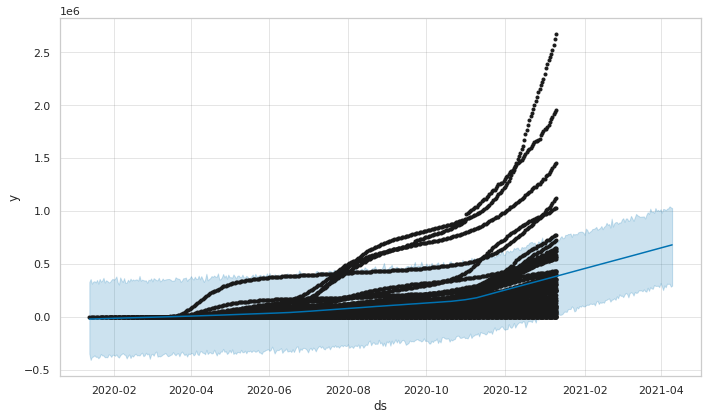

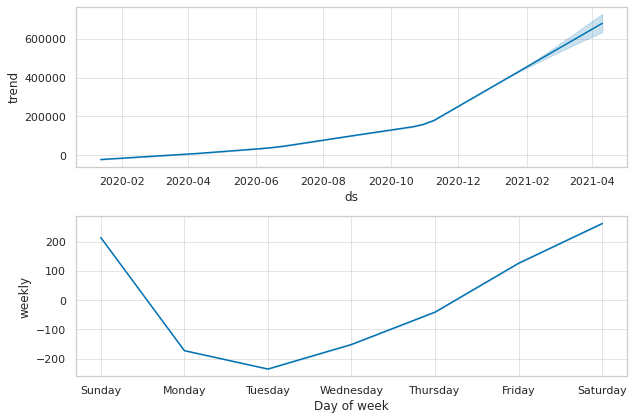

In [44]:
f=prediction(confirmed,90)

In [45]:
f.rename(columns={"ds": "date", "yhat": "new_cases","yhat_lower": "new_cases_min", "yhat_upper": "new_cases_max"},inplace=True)
f[['date', 'new_cases', 'new_cases_min', 'new_cases_max']].tail(10)

,date,new_cases,new_cases_min,new_cases_max
444,2021-04-01,649371.771233,318999.341214,1.015557e+06
445,2021-04-02,652824.153059,290392.992313,9.832241e+05
446,2021-04-03,656245.171121,251669.239078,1.018763e+06
447,2021-04-04,659482.446452,296300.854416,1.016183e+06
448,2021-04-05,662380.979306,278599.788194,1.006243e+06
449,2021-04-06,665603.331564,312567.549618,1.019896e+06
450,2021-04-07,668972.594984,310539.734404,1.025715e+06
451,2021-04-08,672368.490400,311837.644509,1.043139e+06
452,2021-04-09,675820.872225,284378.271107,1.033016e+06
453,2021-04-10,679241.890288,293505.266149,1.026823e+06


#**Next 6 months New_case prediction of COVID_19 in USA**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


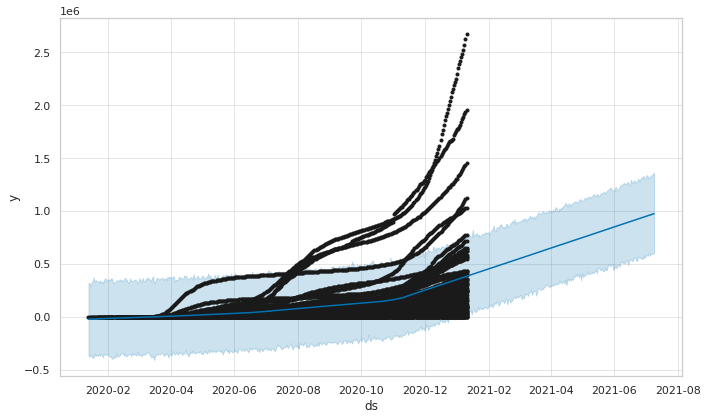

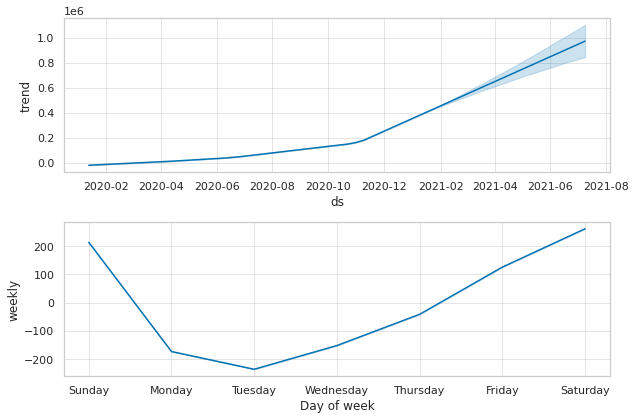

In [46]:
f=prediction(confirmed,180)

In [47]:
f.rename(columns={"ds": "date", "yhat": "new_cases","yhat_lower": "new_cases_min", "yhat_upper": "new_cases_max"},inplace=True)
f[['date', 'new_cases', 'new_cases_min', 'new_cases_max']].tail(10)

,date,new_cases,new_cases_min,new_cases_max
534,2021-06-30,944933.224981,552781.134463,1.303688e+06
535,2021-07-01,948329.120397,582131.496869,1.307808e+06
536,2021-07-02,951781.502223,579023.164247,1.340199e+06
537,2021-07-03,955202.520285,575477.682973,1.327747e+06
538,2021-07-04,958439.795616,602452.869498,1.310727e+06
539,2021-07-05,961338.328469,579564.534408,1.316689e+06
540,2021-07-06,964560.680728,593980.567500,1.334391e+06
541,2021-07-07,967929.944147,593827.007991,1.335478e+06
542,2021-07-08,971325.839563,596838.224214,1.352061e+06
543,2021-07-09,974778.221389,603424.782183,1.360931e+06


# # **2) Predict State wise new death in the next 1, 3, 6 months**

# **Next 1 months death_cases prediction of COVID_19 in USA**

In [49]:
deaths.columns = ['state','ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
deaths.tail()

,state,ds,y
17598,Wyoming,2021-01-06,464.0
17599,Wyoming,2021-01-07,489.0
17600,Wyoming,2021-01-08,489.0
17601,Wyoming,2021-01-09,489.0
17602,Wyoming,2021-01-10,489.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


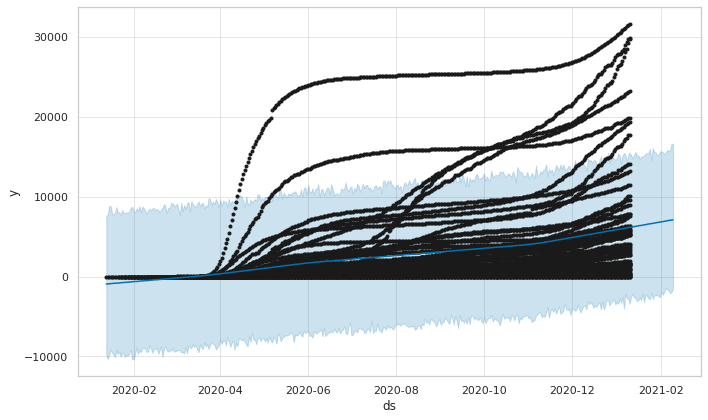

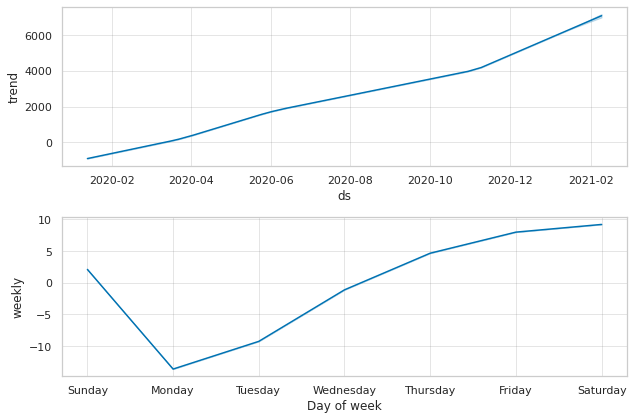

In [50]:
f=prediction(deaths,30)

In [51]:
f.rename(columns={"ds": "date", "yhat": "new_death","yhat_lower": "new_death_min", "yhat_upper": "new_death_max"},inplace=True)
f[['date', 'new_death', 'new_death_min', 'new_death_max']].tail(10)

,date,new_death,new_death_min,new_death_max
384,2021-01-31,6827.467351,-2580.262559,15653.271002
385,2021-02-01,6843.420112,-1897.075221,15678.138687
386,2021-02-02,6879.468180,-2273.463299,15560.996005
387,2021-02-03,6919.276372,-1901.285037,15337.354108
388,2021-02-04,6956.734279,-1382.525466,15513.915426
389,2021-02-05,6991.735356,-1642.886169,15814.198641
390,2021-02-06,7024.625682,-1715.872248,15775.168857
391,2021-02-07,7049.204691,-2081.043332,15807.237534
392,2021-02-08,7065.157451,-1931.458257,16635.578326
393,2021-02-09,7101.205519,-1504.541923,16623.245396


#**Next 3 months New_deaths prediction of COVID_19 in USA**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


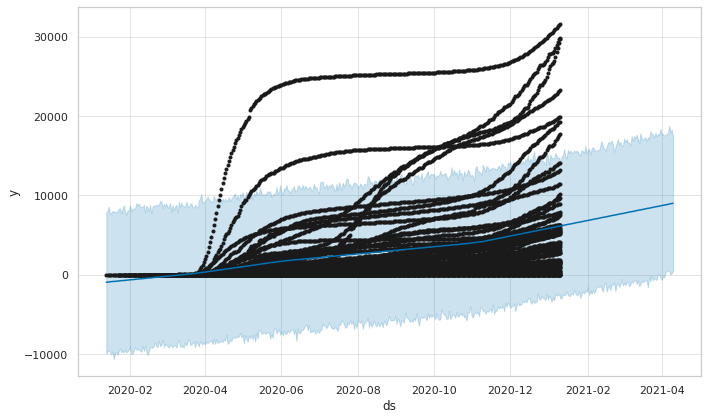

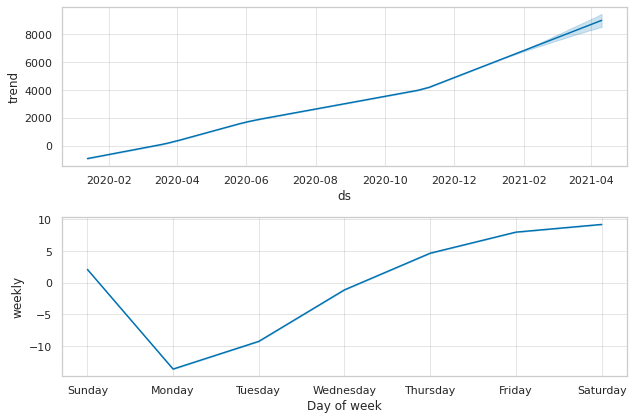

In [52]:
f=prediction(deaths,90)

In [53]:
f.rename(columns={"ds": "date", "yhat": "new_death","yhat_lower": "new_death_min", "yhat_upper": "new_death_max"},inplace=True)
f[['date', 'new_death', 'new_death_min', 'new_death_max']].tail(10)

,date,new_death,new_death_min,new_death_max
444,2021-04-01,8730.632993,-637.049190,17699.299696
445,2021-04-02,8765.634070,-191.524392,17749.020077
446,2021-04-03,8798.524396,-320.632438,17553.951320
447,2021-04-04,8823.103404,285.651455,17643.985980
448,2021-04-05,8839.056165,500.864307,17717.638464
449,2021-04-06,8875.104233,537.546783,17878.036413
450,2021-04-07,8914.912425,430.455086,18829.038119
451,2021-04-08,8952.370332,10.229303,17919.034654
452,2021-04-09,8987.371410,214.154908,18304.835050
453,2021-04-10,9020.261735,393.932394,17531.084553


#**Next 6 months New_deaths prediction of COVID_19 in USA**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


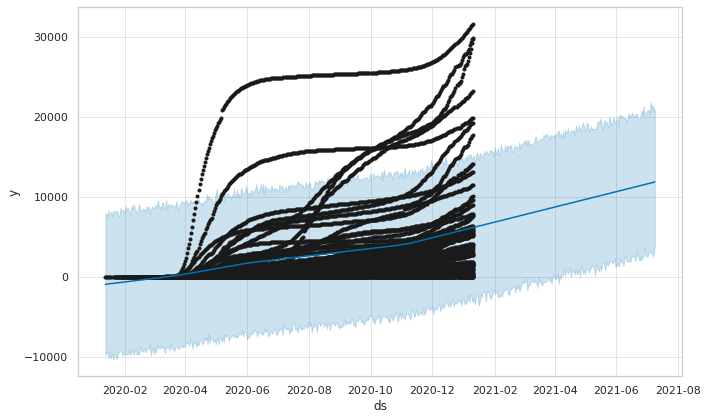

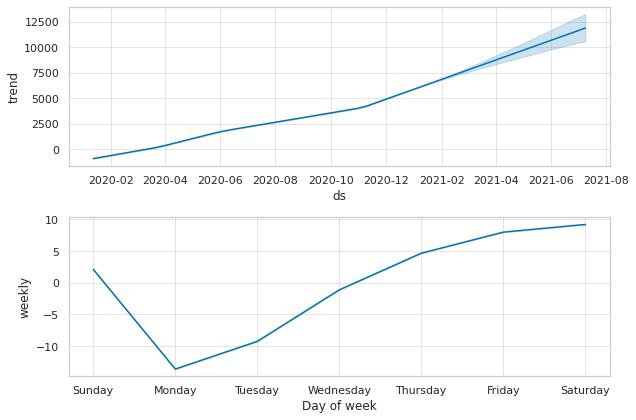

In [54]:
f=prediction(deaths,180)

In [55]:
f.rename(columns={"ds": "date", "yhat": "new_death","yhat_lower": "new_death_min", "yhat_upper": "new_death_max"},inplace=True)
f[['date', 'new_death', 'new_death_min', 'new_death_max']].tail(10)

,date,new_death,new_death_min,new_death_max
534,2021-06-30,11575.760496,2665.894087,20329.048671
535,2021-07-01,11613.218403,2514.711243,20727.824731
536,2021-07-02,11648.219480,2609.472005,20737.396331
537,2021-07-03,11681.109806,3178.981482,20906.422795
538,2021-07-04,11705.688815,3086.100281,20308.657974
539,2021-07-05,11721.641575,3033.715858,21940.782110
540,2021-07-06,11757.689643,3039.782197,20884.281575
541,2021-07-07,11797.497835,2478.840359,21484.196908
542,2021-07-08,11834.955742,3056.975767,20722.391937
543,2021-07-09,11869.956820,3793.790870,21007.503831


# **3) Predict State wise ICU patients in the next 1, 3, 6 months**

# **Next 1 month ICU patients prediction of COVID_19 in USA**

In [58]:
icu.columns = ['state','ds','y']
icu['ds'] = pd.to_datetime(icu['ds'])
icu.tail()

,state,ds,y
17598,Wyoming,2021-01-06,0.0
17599,Wyoming,2021-01-07,0.0
17600,Wyoming,2021-01-08,0.0
17601,Wyoming,2021-01-09,0.0
17602,Wyoming,2021-01-10,0.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


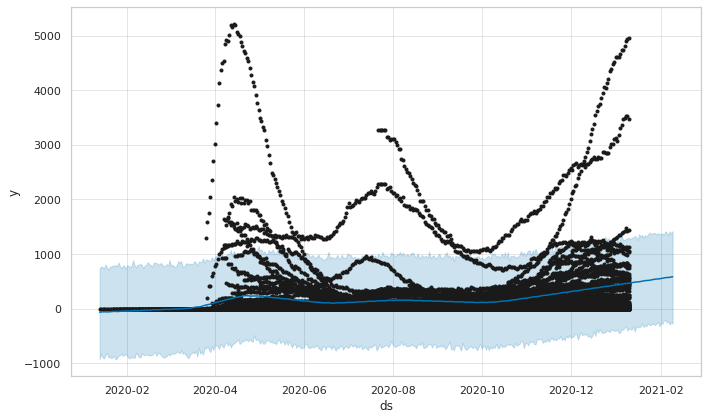

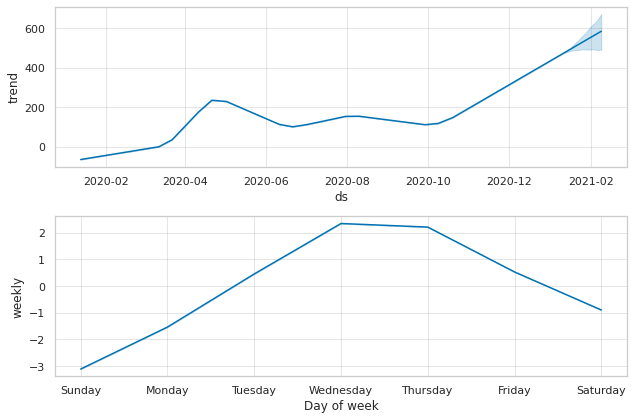

In [59]:
f=prediction(icu,30)

In [61]:
f.rename(columns={"ds": "date", "yhat": "ICU_patients","yhat_lower": "ICU_patients_min", "yhat_upper": "ICU_patients_max"},inplace=True)
f[['date', 'ICU_patients', 'ICU_patients_min', 'ICU_patients_max']].tail(10)

,date,ICU_patients,ICU_patients_min,ICU_patients_max
384,2021-01-31,545.719512,-326.955005,1362.373508
385,2021-02-01,551.181940,-266.857321,1367.945340
386,2021-02-02,557.061379,-280.353387,1378.332833
387,2021-02-03,562.841031,-217.434145,1348.913824
388,2021-02-04,566.597423,-210.201700,1415.427817
389,2021-02-05,568.807385,-258.383091,1392.795946
390,2021-02-06,571.272730,-228.926693,1342.193224
391,2021-02-07,572.950844,-291.513759,1418.389454
392,2021-02-08,578.413272,-251.497605,1372.394977
393,2021-02-09,584.292710,-274.741452,1421.007134


# **Next 3 months ICU patients prediction of COVID_19 in USA**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


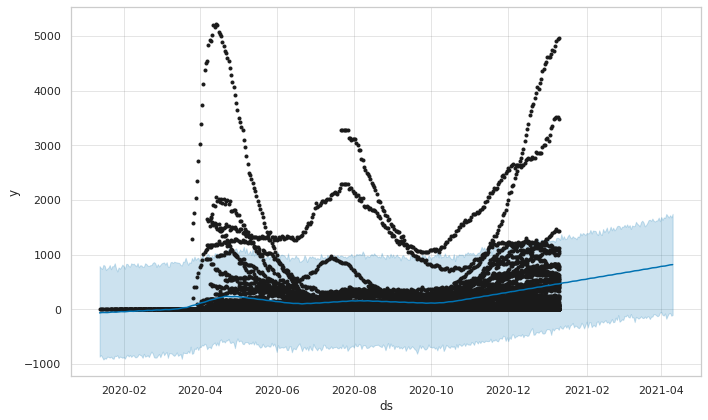

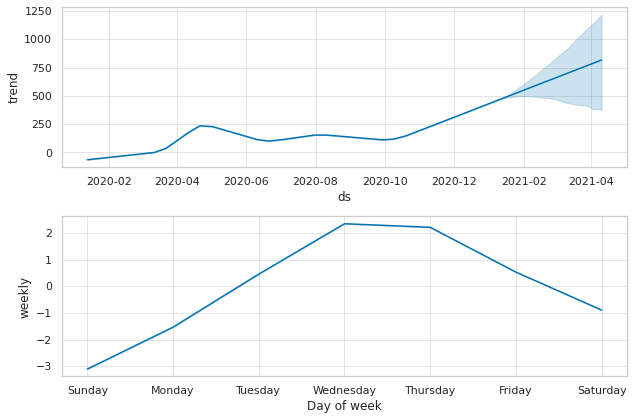

In [62]:
f=prediction(icu,90)

In [63]:
f.rename(columns={"ds": "date", "yhat": "ICU_patients","yhat_lower": "ICU_patients_min", "yhat_upper": "ICU_patients_max"},inplace=True)
f[['date', 'ICU_patients', 'ICU_patients_min', 'ICU_patients_max']].tail(10)

,date,ICU_patients,ICU_patients_min,ICU_patients_max
444,2021-04-01,784.448075,-51.568210,1687.664166
445,2021-04-02,786.658037,-103.478647,1633.384434
446,2021-04-03,789.123382,-114.983467,1680.693299
447,2021-04-04,790.801496,-76.755164,1668.597883
448,2021-04-05,796.263924,-174.225232,1742.296390
449,2021-04-06,802.143362,-119.638407,1708.328767
450,2021-04-07,807.923014,-76.564936,1678.016469
451,2021-04-08,811.679407,-67.687318,1719.097592
452,2021-04-09,813.889369,-118.169083,1679.282492
453,2021-04-10,816.354714,-104.193257,1744.767343


# **Next 6 months ICU patients prediction of COVID_19 in USA**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


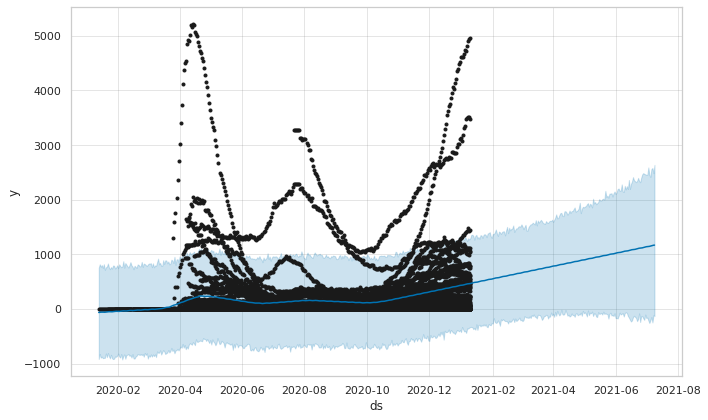

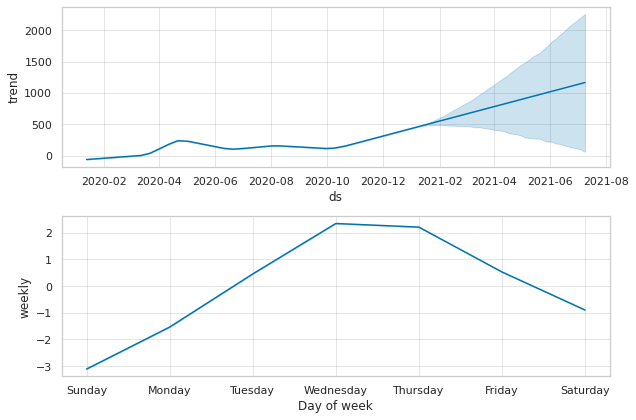

In [64]:
f=prediction(icu,180)

In [65]:
f.rename(columns={"ds": "date", "yhat": "ICU_patients","yhat_lower": "ICU_patients_min", "yhat_upper": "ICU_patients_max"},inplace=True)
f[['date', 'ICU_patients', 'ICU_patients_min', 'ICU_patients_max']].tail(10)

,date,ICU_patients,ICU_patients_min,ICU_patients_max
534,2021-06-30,1134.698992,-103.208676,2463.382882
535,2021-07-01,1138.455385,-168.129918,2455.788307
536,2021-07-02,1140.665347,-158.190299,2456.002828
537,2021-07-03,1143.130692,-211.174969,2590.845626
538,2021-07-04,1144.808805,-258.545519,2454.095541
539,2021-07-05,1150.271234,-205.898416,2415.719109
540,2021-07-06,1156.150672,-149.907332,2560.817610
541,2021-07-07,1161.930324,-248.524439,2580.393531
542,2021-07-08,1165.686717,-114.466887,2485.114932
543,2021-07-09,1167.896678,-130.510823,2636.820867
